<a href="https://colab.research.google.com/github/Hk564/Datascience/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the data of daily and sunday circulation of 34 newspaper,predicting the sunday circulation to start one

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NewspaperData.xlsx to NewspaperData.xlsx


In [3]:
df =pd.read_excel("NewspaperData.xlsx")


In [4]:
df

,Newspape,daily,sunday
0,Baltimore,391.952,488.506
1,Boston Glo,516.981,798.298
2,Boston He,355.628,235.084
3,Charlotte,238.555,299.451
4,Chicago Su,537.780,559.093
5,Chicago Tr,733.775,1133.249
6,Cincinnati,198.832,348.744
7,Denver Po,252.624,417.779
8,Des Moine,206.204,344.522
9,Hartford C,231.177,323.084


In [5]:
df = df.drop("Newspape", axis=1)  #remove Newspaper column

In [6]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


Correlation
 why are we checking correlation?
 to check the coefficient pairwise of daily and sunday newspaper
 circulation
 As correlation ranges from -1 to 1 ,to know if its a positive linear relationship or negative or no relationship


In [8]:
df.corr() #its positive linear relationship

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Distribution plot of daily data


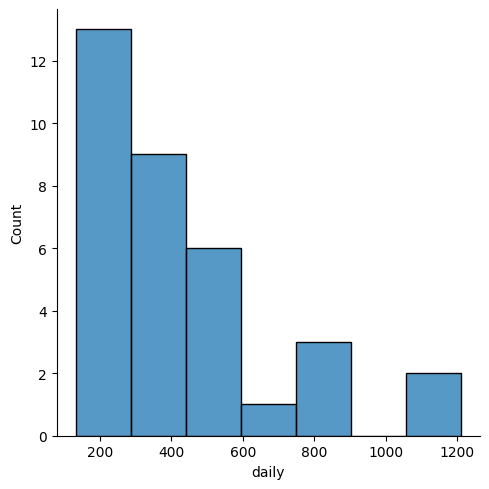

In [9]:
import seaborn as sns
sns.displot(df['daily'])

Fiiting LR Model




In [10]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit()

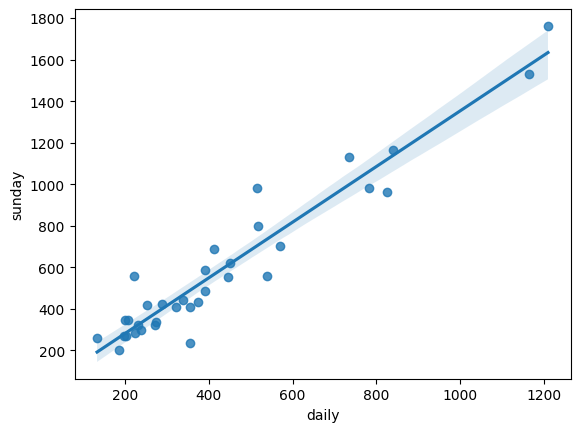

In [11]:
sns.regplot(x="daily",y="sunday",data = df);

In [13]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [15]:
(model.rsquared,model.rsquared_adj) # Rsquared values

(0.9180596895873295, 0.9154990548869336)

Predict new data point



In [20]:
#predict for 200 and 300 daily circulation
newdata = pd.Series([400,700,250,350,420])

In [21]:
df_predict = pd.DataFrame(newdata,columns=['daily'])

In [22]:
df_predict

,daily
0,400
1,700
2,250
3,350
4,420


In [23]:
model.predict(df_predict)

0    549.721533
1    951.635960
2    348.764319
3    482.735795
4    576.515828
dtype: float64